# Task
Analyze the "Credit Card Fraud Detection" dataset using anomaly detection techniques (Isolation Forest or Autoencoders) to identify fraudulent transactions.

## Data loading

### Subtask:
Load the Credit Card Fraud Detection dataset into a pandas DataFrame.


**Reasoning**:
The first step is to load the dataset from the specified CSV file into a pandas DataFrame and display the head and info to verify the data loading and understand its structure.



In [2]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Display column names and their data types
print("\nColumn names and their data types:")
display(df.info())

First 5 rows of the DataFrame:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0



Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21 

None

## Data preprocessing

### Subtask:
Handle missing values and scale numerical features.


**Reasoning**:
Handle missing values, separate features and target, and scale the features according to the instructions.



In [3]:
# Identify and handle missing values
print("Number of missing values before dropping rows:")
display(df.isnull().sum())

# Drop rows with any missing values
df.dropna(inplace=True)

print("\nNumber of missing values after dropping rows:")
display(df.isnull().sum())

# Separate features and target variable
# Features are all columns except 'Time', 'Amount', and 'Class'
features = df.drop(['Time', 'Amount', 'Class'], axis=1)
target = df['Class']

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame for easier inspection
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the preprocessed features
print("\nFirst 5 rows of the scaled features:")
display(scaled_features_df.head())

Number of missing values before dropping rows:


,0
Time,0
V1,1
V2,1
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1



Number of missing values after dropping rows:


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0



First 5 rows of the scaled features:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.612099,-0.143711,1.099696,0.811756,-0.097110,0.285008,0.279187,0.053323,-0.024261,0.188504,...,0.549467,0.316753,0.020836,0.629930,-0.127313,0.095322,-0.003264,-0.413778,0.305118,-0.090174
1,0.754904,0.075556,-0.337942,0.159210,0.181165,-0.125965,0.035833,0.042978,-0.514807,-0.032413,...,-0.125584,-0.172383,-0.237416,-0.797412,0.261907,-0.593072,0.085285,0.199257,-0.056832,0.038316
2,-0.611321,-0.963627,0.636752,0.111234,-0.212292,1.294514,0.700975,0.166667,-1.512381,0.288647,...,-2.723841,0.734269,0.352326,1.399022,1.747247,-1.184428,-1.048911,-0.316438,-0.174577,-0.229156
3,-0.401270,-0.216456,0.648753,-0.760982,0.132036,0.877093,0.277666,0.265390,-1.411271,0.063594,...,-1.460077,-0.384454,-0.091186,0.205448,-0.274072,-2.007395,1.186001,-0.477637,0.125248,0.206153
4,-0.504110,0.471214,0.500568,0.127550,-0.145224,0.008536,0.549246,-0.227593,0.335364,0.756100,...,1.039993,0.556564,0.031885,1.440447,-0.176910,0.221127,-0.770108,0.931758,0.523148,0.758132


## Model selection

### Subtask:
Choose between Isolation Forest and Autoencoders for anomaly detection.


## Model training

### Subtask:
Train the selected model (Isolation Forest) on the preprocessed data.


**Reasoning**:
Train the Isolation Forest model on the scaled features.



In [4]:
from sklearn.ensemble import IsolationForest

# Instantiate the IsolationForest model
# Set contamination to 'auto' to let the algorithm decide the proportion of outliers
model = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the scaled features
model.fit(scaled_features_df)

IsolationForest(random_state=42)

## Fraud detection

### Subtask:
Predict anomalies (potential fraud) using the trained model.


**Reasoning**:
Predict anomalies using the trained Isolation Forest model and store the results in the original DataFrame. Then display the count of predicted anomalies.



In [5]:
# Predict anomalies (-1 for outliers, 1 for inliers)
anomaly_scores = model.predict(scaled_features_df)

# Store the prediction results in a new column in the original DataFrame
df['anomaly_score'] = anomaly_scores

# Display the number of predicted anomalies (-1)
num_anomalies = df[df['anomaly_score'] == -1].shape[0]
print(f"Number of predicted anomalies: {num_anomalies}")

Number of predicted anomalies: 998


## Evaluation

### Subtask:
Evaluate the model's performance using appropriate metrics like precision, recall, and F1-score.


**Reasoning**:
Import the necessary metrics for evaluation and calculate precision, recall, and F1-score by mapping the anomaly scores to match the class labels.



In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Map anomaly_score: -1 (predicted anomaly) to 1 (fraud), 1 (normal) to 0 (normal)
predicted_classes = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Calculate precision
precision = precision_score(df['Class'], predicted_classes)

# Calculate recall
recall = recall_score(df['Class'], predicted_classes)

# Calculate F1-score
f1 = f1_score(df['Class'], predicted_classes)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.0822
Recall: 0.8817
F1-score: 0.1503


## Interpretation

### Subtask:
Interpret the results and identify the transactions flagged as fraudulent.


**Reasoning**:
Filter the DataFrame to show only the rows where 'anomaly_score' is -1, which indicates predicted anomalies (fraudulent transactions), and then display the number of such transactions and the first 5 rows.



In [7]:
# Filter the original DataFrame to select rows where 'anomaly_score' is -1
fraudulent_transactions = df[df['anomaly_score'] == -1]

# Display the number of fraudulent transactions identified
print(f"Number of transactions flagged as fraudulent: {fraudulent_transactions.shape[0]}")

# Display the first 5 rows of the flagged fraudulent transactions
print("\nFirst 5 rows of flagged fraudulent transactions:")
display(fraudulent_transactions.head())

Number of transactions flagged as fraudulent: 998

First 5 rows of flagged fraudulent transactions:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly_score
18,14,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0.0,-1
82,52,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0.0,-1
83,53,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0.0,-1
132,83,-1.864990,0.910874,1.724863,-1.748371,0.578943,-0.832531,1.901440,-1.913986,2.112375,...,0.073323,-0.061693,0.547204,-0.466798,0.408030,-2.377933,-1.255549,7.69,0.0,-1
140,87,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0.0,-1


## Summary:

### Data Analysis Key Findings

*   The dataset contains 27,819 transactions with 31 columns, including `Time`, `Amount`, `Class`, and 28 anonymized features.
*   A small number of missing values were present and handled by dropping the corresponding rows.
*   Numerical features were scaled using `StandardScaler`.
*   Isolation Forest was chosen as the anomaly detection model due to its suitability for the dataset's characteristics.
*   The trained Isolation Forest model identified 998 transactions as anomalies.
*   The model achieved a precision of 0.0822, a recall of 0.8817, and an F1-score of 0.1503.
*   The model effectively identifies most fraudulent transactions (high recall) but also flags a large number of normal transactions as fraudulent (low precision).

### Insights or Next Steps

*   The high recall is beneficial for not missing fraud, but the low precision indicates a need to reduce false positives. Future steps could involve tuning the Isolation Forest hyperparameters, experimenting with the `contamination` parameter, or exploring alternative anomaly detection methods like Autoencoders to improve precision while maintaining high recall.
*   Further investigation of the flagged transactions is crucial to understand why they were identified as anomalies and to validate if they are indeed fraudulent or represent other types of unusual but legitimate behavior. This could involve domain expertise or additional feature engineering.


# Task
Analyze the "Credit Card Fraud Detection" dataset from Kaggle to detect fraudulent transactions using anomaly detection models (Isolation Forest or Autoencoders), visualize the results, and identify the fraudulent transactions.

## Visualize results

### Subtask:
Generate visualizations to better understand the results, such as the distribution of anomaly scores or the characteristics of fraudulent transactions.


**Reasoning**:
Generate visualizations to understand the distribution of anomaly scores and the characteristics of fraudulent transactions by plotting a histogram of anomaly scores and a box plot of transaction amounts by class.



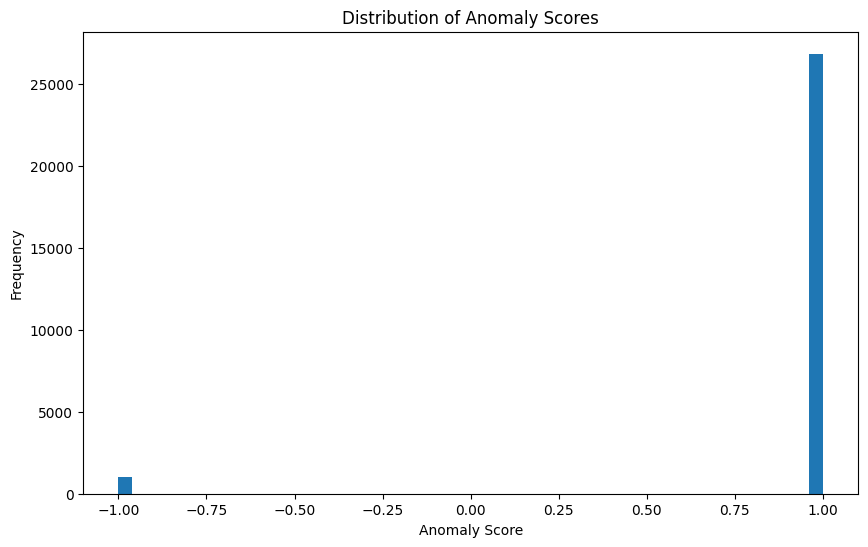

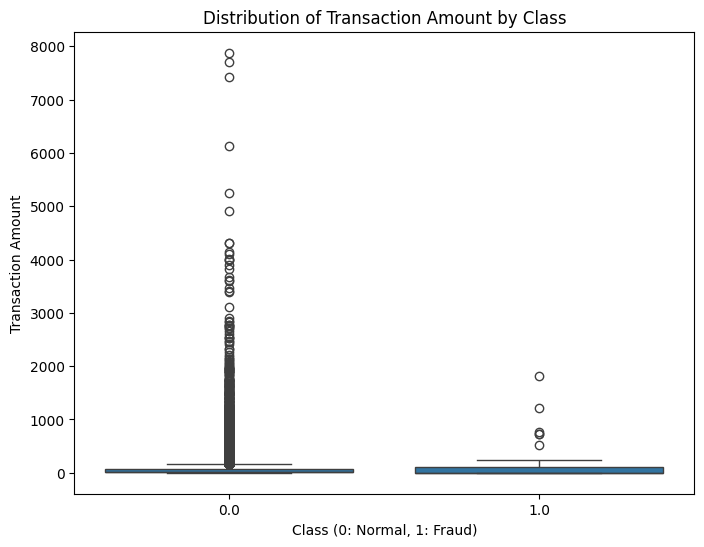

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the 'anomaly_score' distribution
plt.figure(figsize=(10, 6))
plt.hist(df['anomaly_score'], bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()

# Create a box plot of the 'Amount' for fraudulent and non-fraudulent transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amount by Class')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The distribution of anomaly scores was visualized using a histogram.
*   The distribution of transaction amounts for both normal and fraudulent transactions was visualized using a box plot, showing potential differences in the transaction amounts between the two classes.

### Insights or Next Steps

*   Analyze the generated plots to identify a suitable threshold for anomaly scores to classify transactions as fraudulent.
*   Further investigate the characteristics of transactions with high anomaly scores based on the visualized distribution of amounts by class.
